<a href="https://colab.research.google.com/github/IvanCampos11/Build-Week-Project/blob/master/AppStorePopularity_BuildWeek_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pylab import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
android = pd.read_csv('https://raw.githubusercontent.com/IvanCampos11/Build-Week-Project/master/googleplaystore.csv')
apple = pd.read_csv('https://github.com/IvanCampos11/Build-Week-Project/raw/master/Applestore.csv')

In [3]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

In [5]:
android.dropna(how ='any', inplace = True)

In [6]:
android.isnull().sum().sort_values(ascending=False)

Android Ver       0
Current Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [7]:
android = android.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

In [8]:
android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [9]:
apple.isnull().sum().sort_values(ascending=False)

vpp_lic             0
rating_count_ver    0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
user_rating         0
lang.num            0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
Unnamed: 0          0
dtype: int64

In [10]:
android['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating: GooglePlay Store')

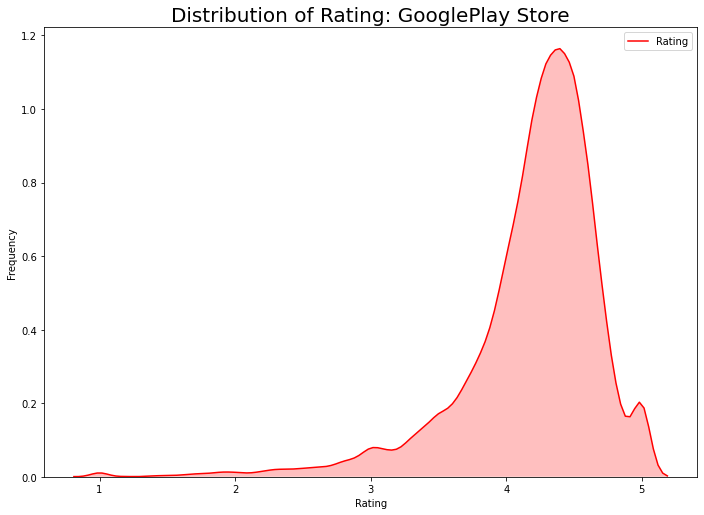

In [28]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(android.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating: GooglePlay Store',size = 20)

In [12]:
android['Reviews'] = android['Reviews'].astype(int)

Text(0.5, 1.0, 'Distribution of Reveiw: GooglePlay')

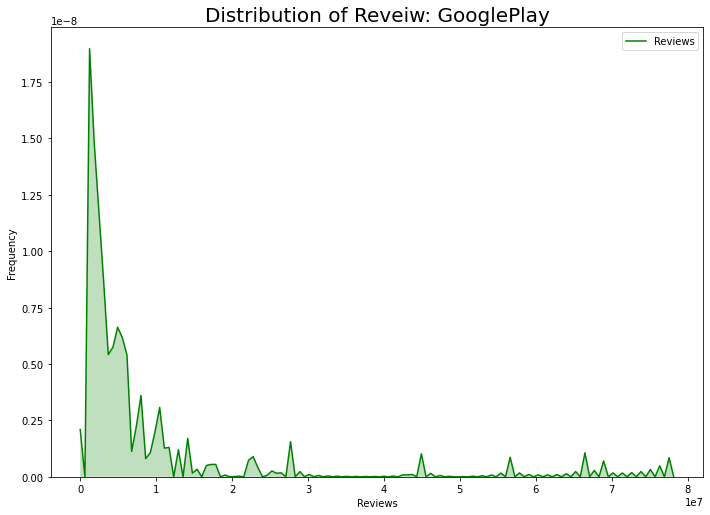

In [48]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(android.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw: GooglePlay',size = 20)

Text(0.5, 1.0, 'Rating VS Reveiws: GooglePlay')

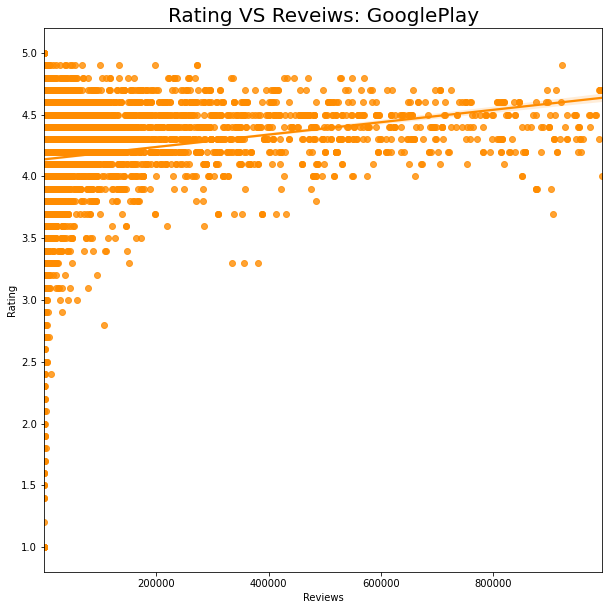

In [34]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=android[android['Reviews']<1000000]);
plt.title('Rating VS Reveiws: GooglePlay',size = 20)

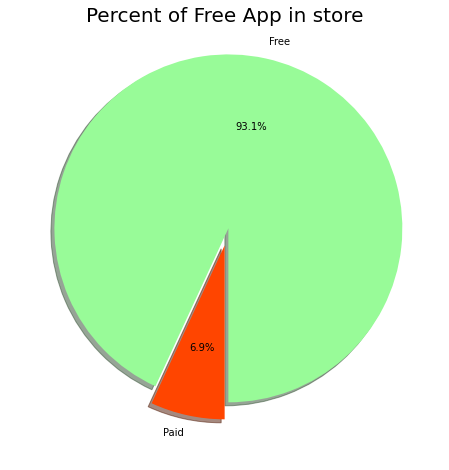

In [16]:
labels =android['Type'].value_counts(sort = True).index
sizes = android['Type'].value_counts(sort = True)

colors = ["palegreen","orangered"]
explode = (0.1,0)
 
rcParams['figure.figsize'] = 8,8
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

In [27]:
fig = go.Figure(data=go.Histogram(x=android['Category']))
fig.update_layout(title="Unique quantity of apps(by category): GooglePlayStore",xaxis_title="Category",yaxis_title="Quantity of unique apps",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [18]:
apple['cont_rating'] = apple['cont_rating'].str.replace('+', '')
apple['cont_rating'] = apple['cont_rating'].astype(int)

In [19]:
apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference,37,5,45,1


In [24]:
indexNames = apple['user_rating'][ apple['user_rating'] == 0 ].index
apple['user_rating'].drop(indexNames , inplace=True)

Text(0.5, 1.0, 'Distribution of Rating: Apple')

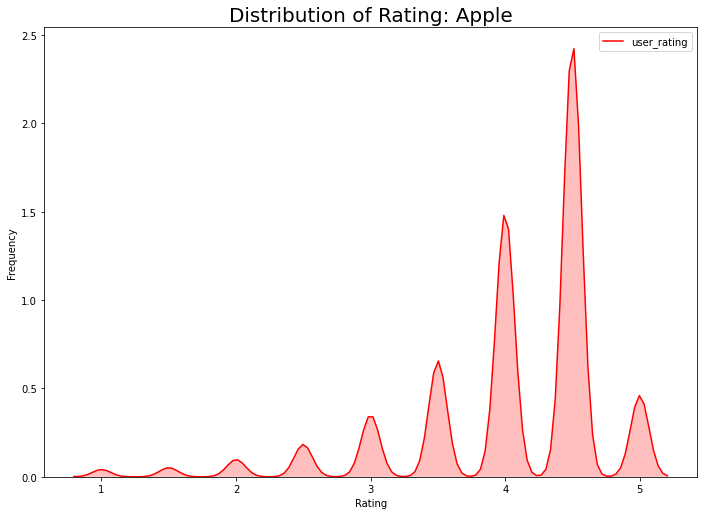

In [26]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(apple.user_rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating: Apple',size = 20)

Text(0.5, 1.0, 'Distribution of Reveiw: Apple')

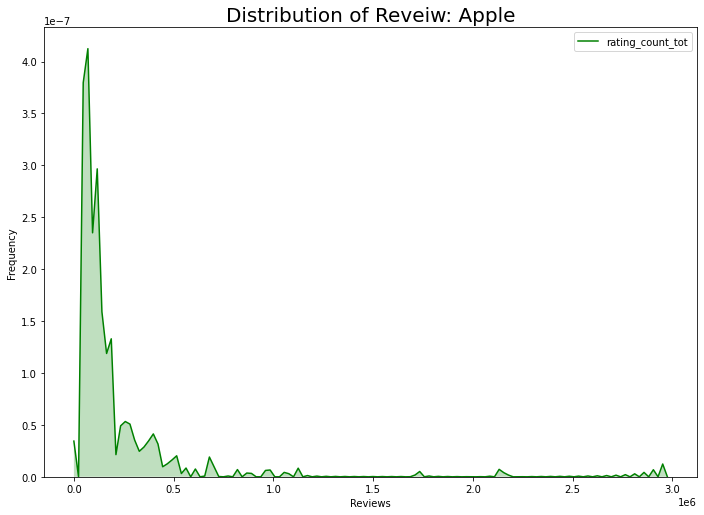

In [47]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(apple.rating_count_tot, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw: Apple',size = 20)

Text(0.5, 1.0, 'Rating VS Reveiws: Apple')

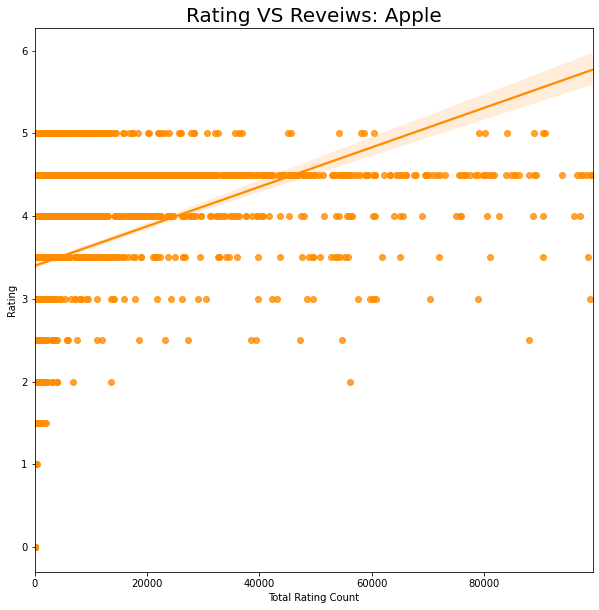

In [46]:
plt.figure(figsize = (10,10))
sns.regplot(x="rating_count_tot", y="user_rating", color = 'darkorange',data=apple[apple['rating_count_tot']<100000]);
plt.ylabel('Rating')
plt.xlabel('Total Rating Count')
plt.title('Rating VS Reveiws: Apple',size = 20)

In [58]:
android['Installs'] = android['Installs'].str.replace(',','')
android['Installs'] = android['Installs'].str.replace('+','')

In [59]:
android['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

In [65]:
Sorted_value = sorted(list(android['Installs'].unique()))

In [66]:
android['Installs'] = android['Installs'].astype(int)
android['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

Text(0.5, 1.0, 'Rating VS Installs')

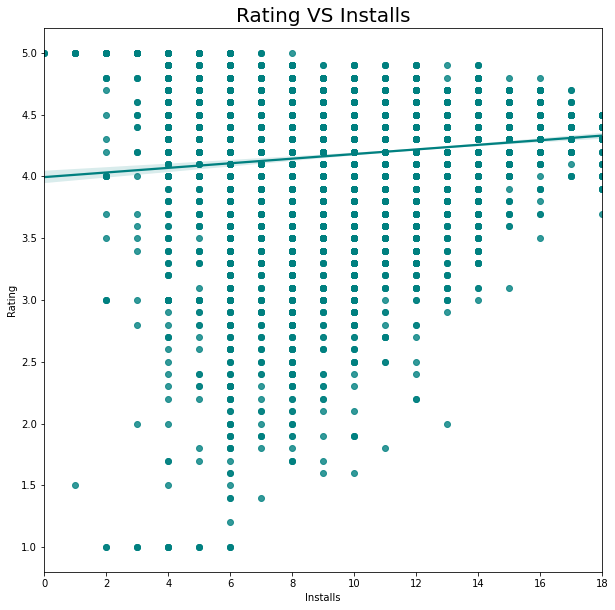

In [67]:
plt.figure(figsize = (10,10))
sns.regplot(x=android.Installs, y=android.Rating, color = 'teal',data=android);
plt.title('Rating VS Installs',size = 20)